In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('./src/fix_data.csv')

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
x = data['battery_size'].values.reshape(-1, 1)
y = data['best_price'].values
model = LinearRegression().fit(x,y)

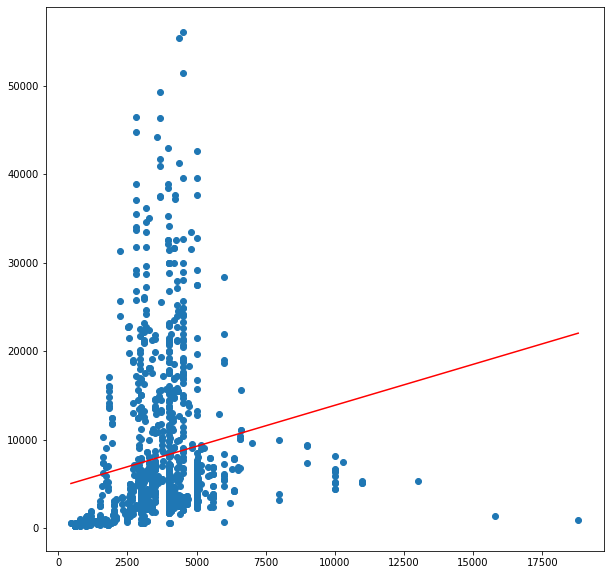

In [17]:
new_x = np.array([x.min(), x.max()])
y_pred = model.predict(new_x.reshape(-1, 1))
plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.plot(new_x, y_pred, color='r')

Как можно заметить для пары данных "Размер батареи"-"Цена" не очень подходит линейная регрессия. Происходит это из-за того, что на рынке мобильных устройств присутствуют телефоны с аккумулятором большого объема и низкой стоимостью, но ограниченные во всех остальных возможностях по сравнению с современными смартфонами, которые составляют основную долю рынка.

Возьмем в качестве независимых переменных линейной регрессии только смартфоны на базе операционных систем Android и iOS

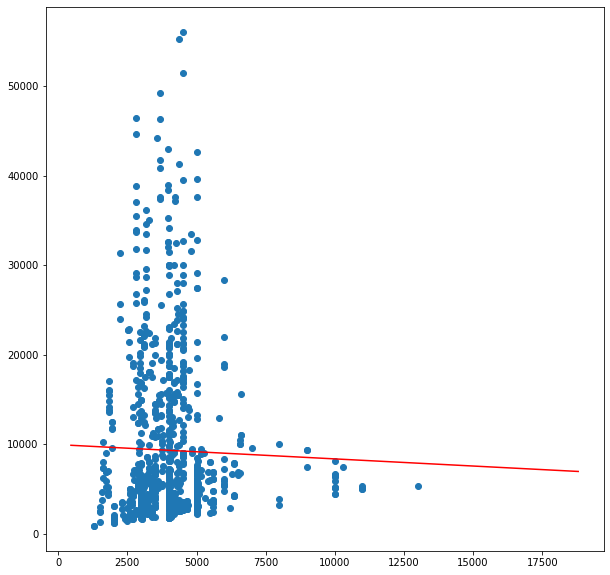

In [26]:
new_data = data[(data.os == 'iOS') | (data.os == 'Android')]
x2 = new_data.battery_size.values.reshape(-1, 1)
y2 = new_data.best_price.values
model2 = LinearRegression().fit(x2,y2)

new_x2 = np.array([x.min(), x.max()])
y2_pred = model2.predict(new_x2.reshape(-1, 1))
plt.figure(figsize=(10, 10))
plt.scatter(x2, y2)
plt.plot(new_x2, y2_pred, color='r')

In [28]:
data[data.os == 'iOS']

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
63,63,Nokia,2720 Flip Black (16BTSB01A10),iOS,883,2530.0,2395.0,2689.0,26,2.8,4.0,1500.0,9-2019
1119,1119,Apple,iPhone 11 128GB Black (MWLE2),iOS,1215,22320.0,19740.0,25178.0,100,6.1,128.0,3110.0,9-2019
1120,1120,Apple,iPhone 11 128GB Dual Sim Black (MWN72),iOS,968,23176.0,20868.0,25645.0,37,6.1,128.0,3110.0,9-2019
1121,1121,Apple,iPhone 11 128GB Slim Box Black (MHDH3),iOS,1106,22105.0,20469.0,25248.0,46,6.1,128.0,3110.0,11-2020
1122,1122,Apple,iPhone 11 256GB Black (MWLL2),iOS,1090,25919.0,21432.0,28499.0,76,6.1,256.0,3110.0,9-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,1216,Apple,iPhone XS 64GB Space Gray (MT9E2),iOS,1187,19790.0,12505.0,23928.0,53,5.8,64.0,2568.0,9-2018
1217,1217,Apple,iPhone XS Max 256GB Gold (MT552),iOS,1128,24184.0,18399.0,30600.0,37,6.5,256.0,3174.0,9-2018
1218,1218,Apple,iPhone XS Max 512GB Space Gray (MT622),iOS,842,27190.0,21150.0,30200.0,47,6.5,512.0,3174.0,9-2018
1219,1219,Apple,iPhone XS Max 64GB Gold (MT522),iOS,1101,22685.0,16018.0,27900.0,61,6.5,64.0,3174.0,9-2018
